In [71]:
#导入相应的包
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [72]:
df_train=pd.read_csv("./train.csv")
df_test=pd.read_csv("./test.csv")
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
#保存训练集的Survived
survived_train=df_train.Survived
#联合训练集和测试集合
data=pd.concat([df_train.drop(['Survived'],axis=1),df_test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [75]:
#使用中位数填充NAN
data['Age']=data.Age.fillna(data.Age.median())
data['Fare']=data.Fare.fillna(data.Fare.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [76]:
#将性别用0,1替换 male:1 female:0
data=pd.get_dummies(data,columns=["Sex"],drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [77]:
#使用变量['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']作为决策树数据模型
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [78]:
#创建决策树分类器
#将数据分为测试集合与训练集合
data_train=data.iloc[:891]
data_test=data.iloc[891:]
#由于scikit-learn需要的是arrays数据类型,所以将数据转换为arrays类型
X=data_train.values
test=data_test.values
y=survived_train.values
clf=tree.DecisionTreeClassifier(max_depth=3)
#使用训练集进行训练
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
Y_pred=clf.predict(test)
df_test["Survived"]=Y_pred
df_test[["PassengerId","Survived"]].to_csv("./data/predictions/tree_survived.csv")
#提交到Kaggle,结果为:0.77990

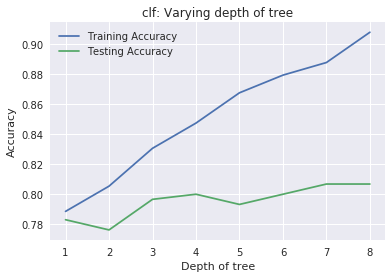

In [84]:
#为什么选择max_depth=3?
#将训练集进一步分为测试集合与训练集合,寻找最佳深度
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)
dep=np.arange(1,9)
train_accuracy=np.empty(len(dep))
test_accuracy=np.empty(len(dep))

for i,k in enumerate(dep):
    clf=tree.DecisionTreeClassifier(max_depth=k)
    clf.fit(X_train,y_train)
    train_accuracy[i]=clf.score(X_train,y_train)
    test_accuracy[i]=clf.score(X_test,y_test)
#绘图
dep
plt.title('clf: Varying depth of tree')
plt.plot(dep,train_accuracy,label='Training Accuracy')
plt.plot(dep,test_accuracy,label='Testing Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()